In [1]:
import sys
sys.path.append('../')
from attention import *
import jax.numpy as jnp
import numpy as np

In [2]:
# Goal: show that attention scales quadratically in both memory and time
# with context length
emb_size = 4
n_heads = 1
batch_size = 1

rng = jax.random.PRNGKey(0)

mha = MultiHeadAttention(emb_size, n_heads, v_bias=False)
state = mha.init_state(rng)

x = jax.random.normal(rng, (1, batch_size, emb_size))
out = mha(state, x, x, x)
print(x.shape)

(1, 1, 4)


In [3]:
# Time scaling
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

context_lens = np.arange(1, 15000, 100)
times = []

In [ ]:

for context_len in tqdm(context_lens):
    x = jax.random.normal(rng, (1, batch_size, emb_size))
    x = jnp.tile(x, (context_len, 1, 1))
    start = time.time()
    out = mha(state, x, x, x)
    end = time.time()
    times.append(end - start)

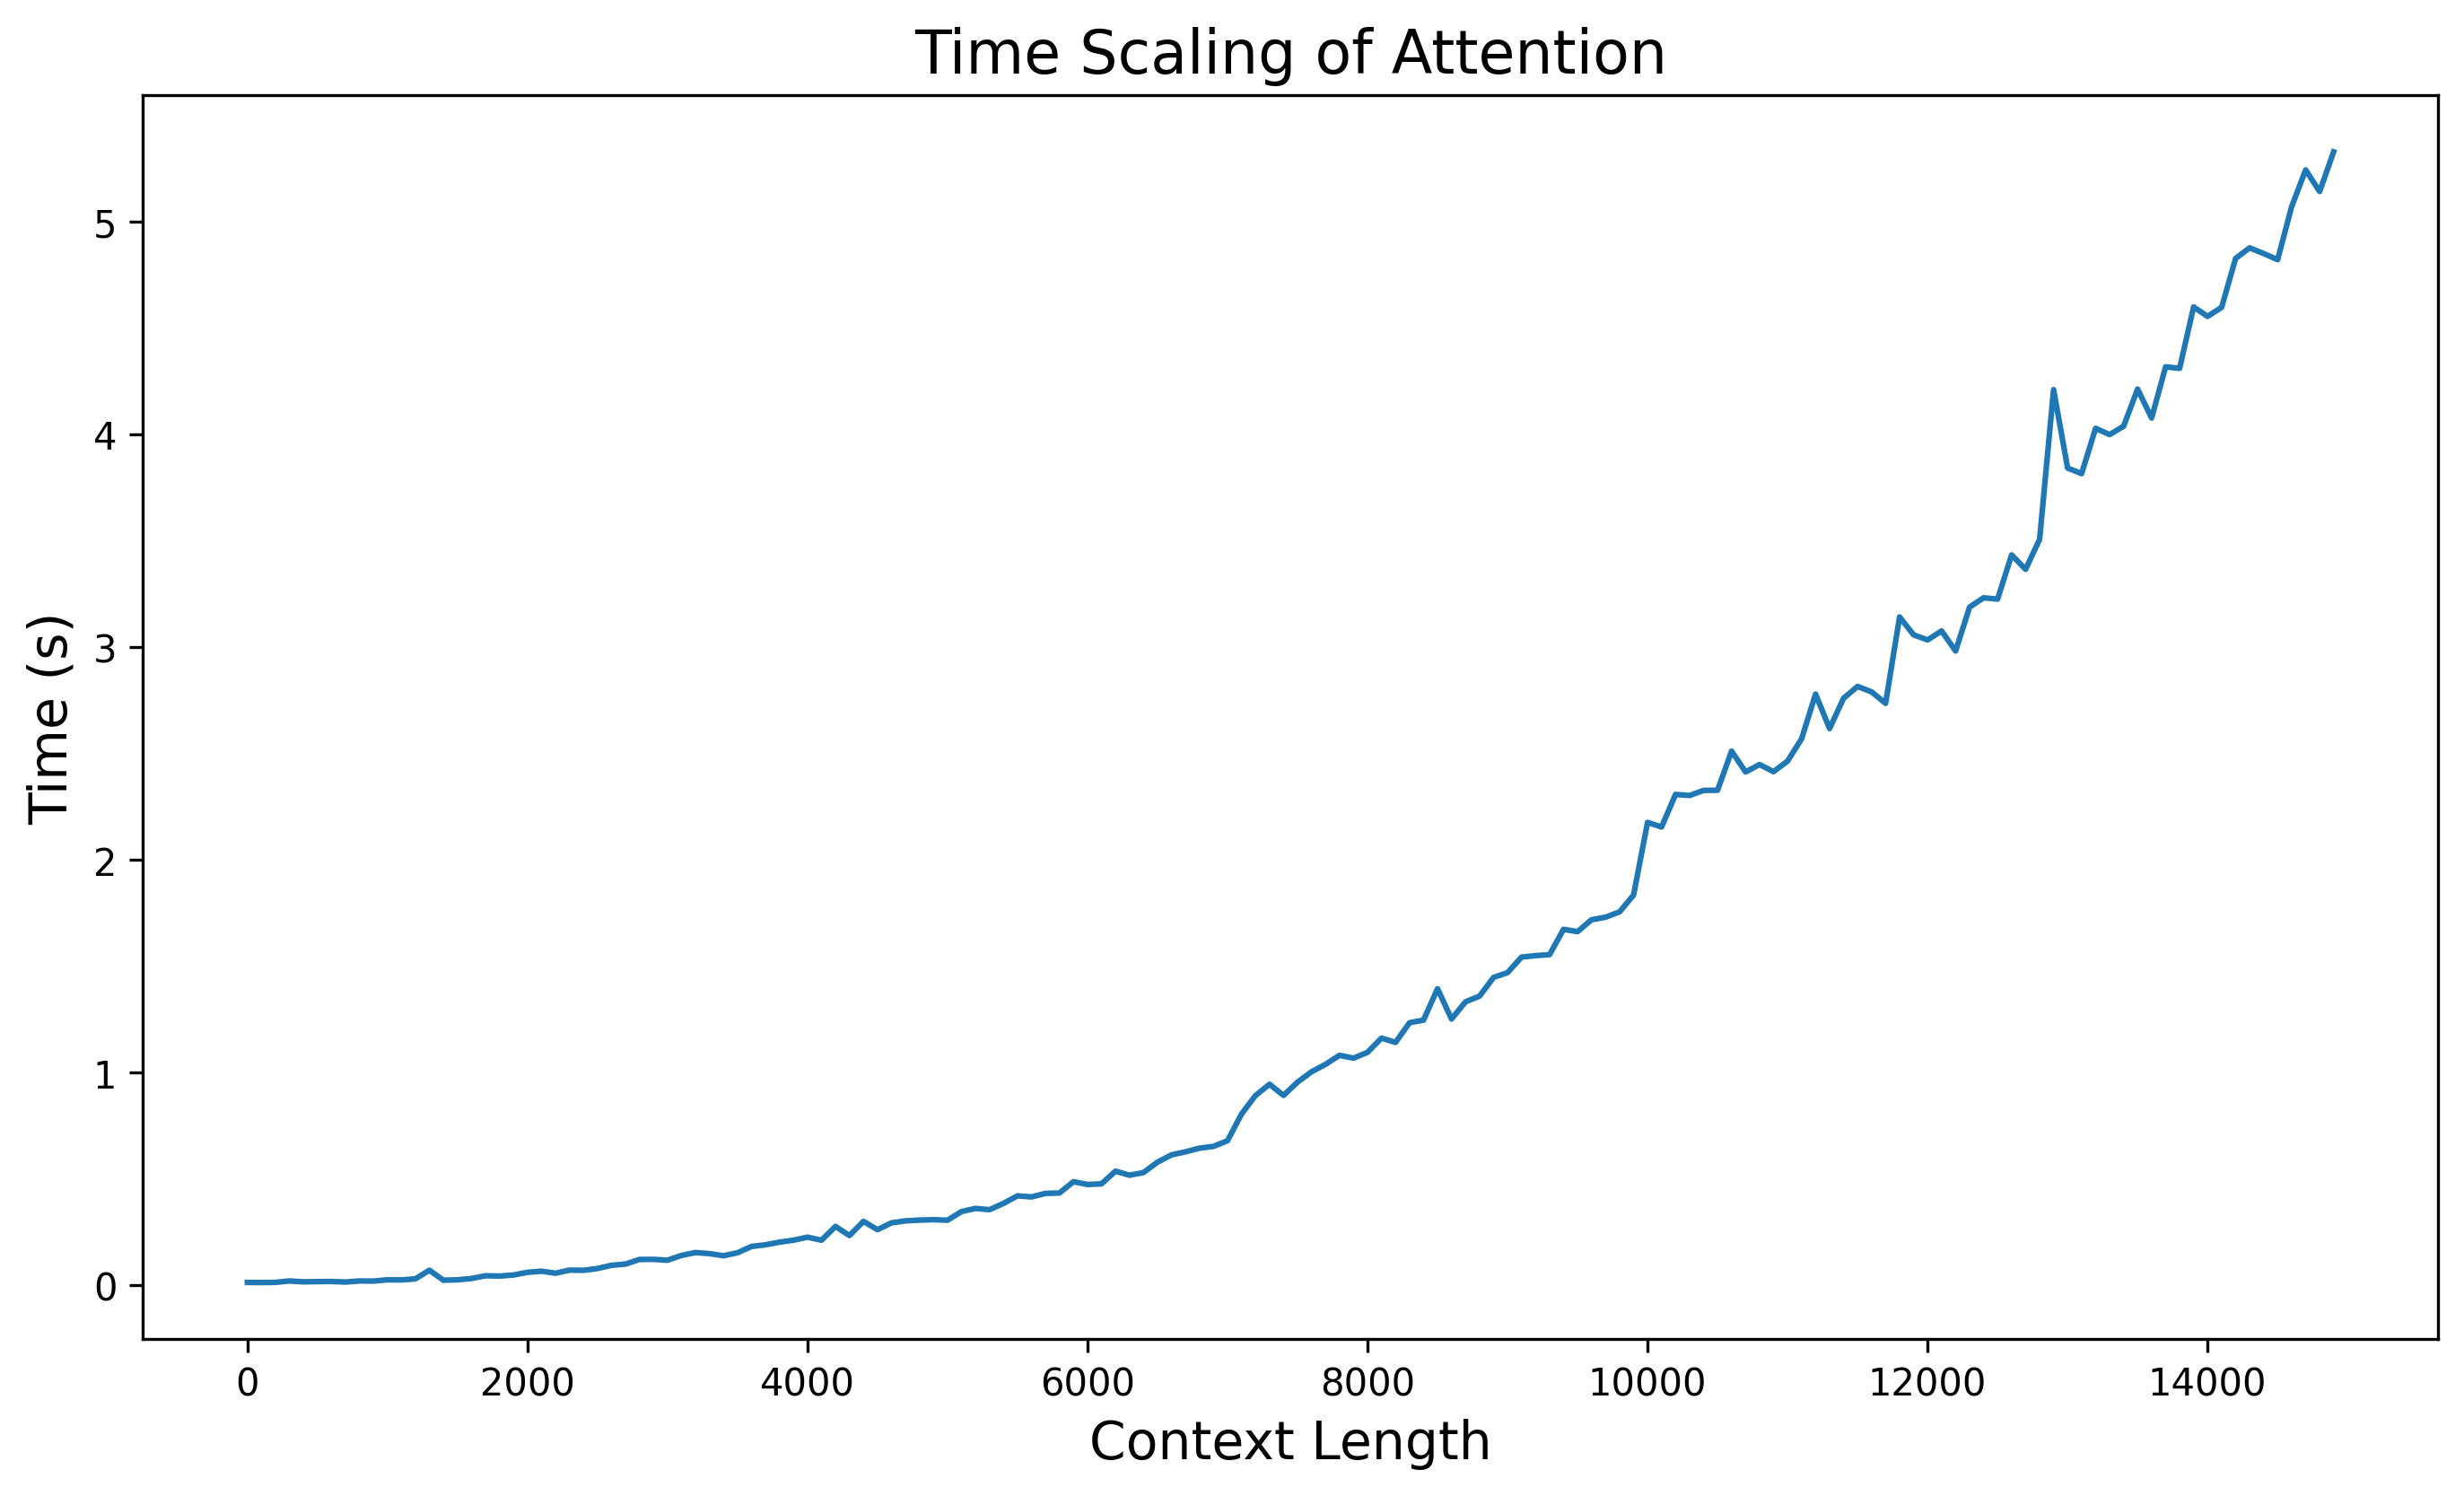

In [34]:
# make new nice plot

plt.figure(figsize=(11, 6), dpi=300)
plt.plot(context_lens, times)
plt.xlabel('Context Length', fontsize=14)
plt.ylabel('Time (s)', fontsize=14)
plt.title('Time Scaling of Attention', fontsize=16);

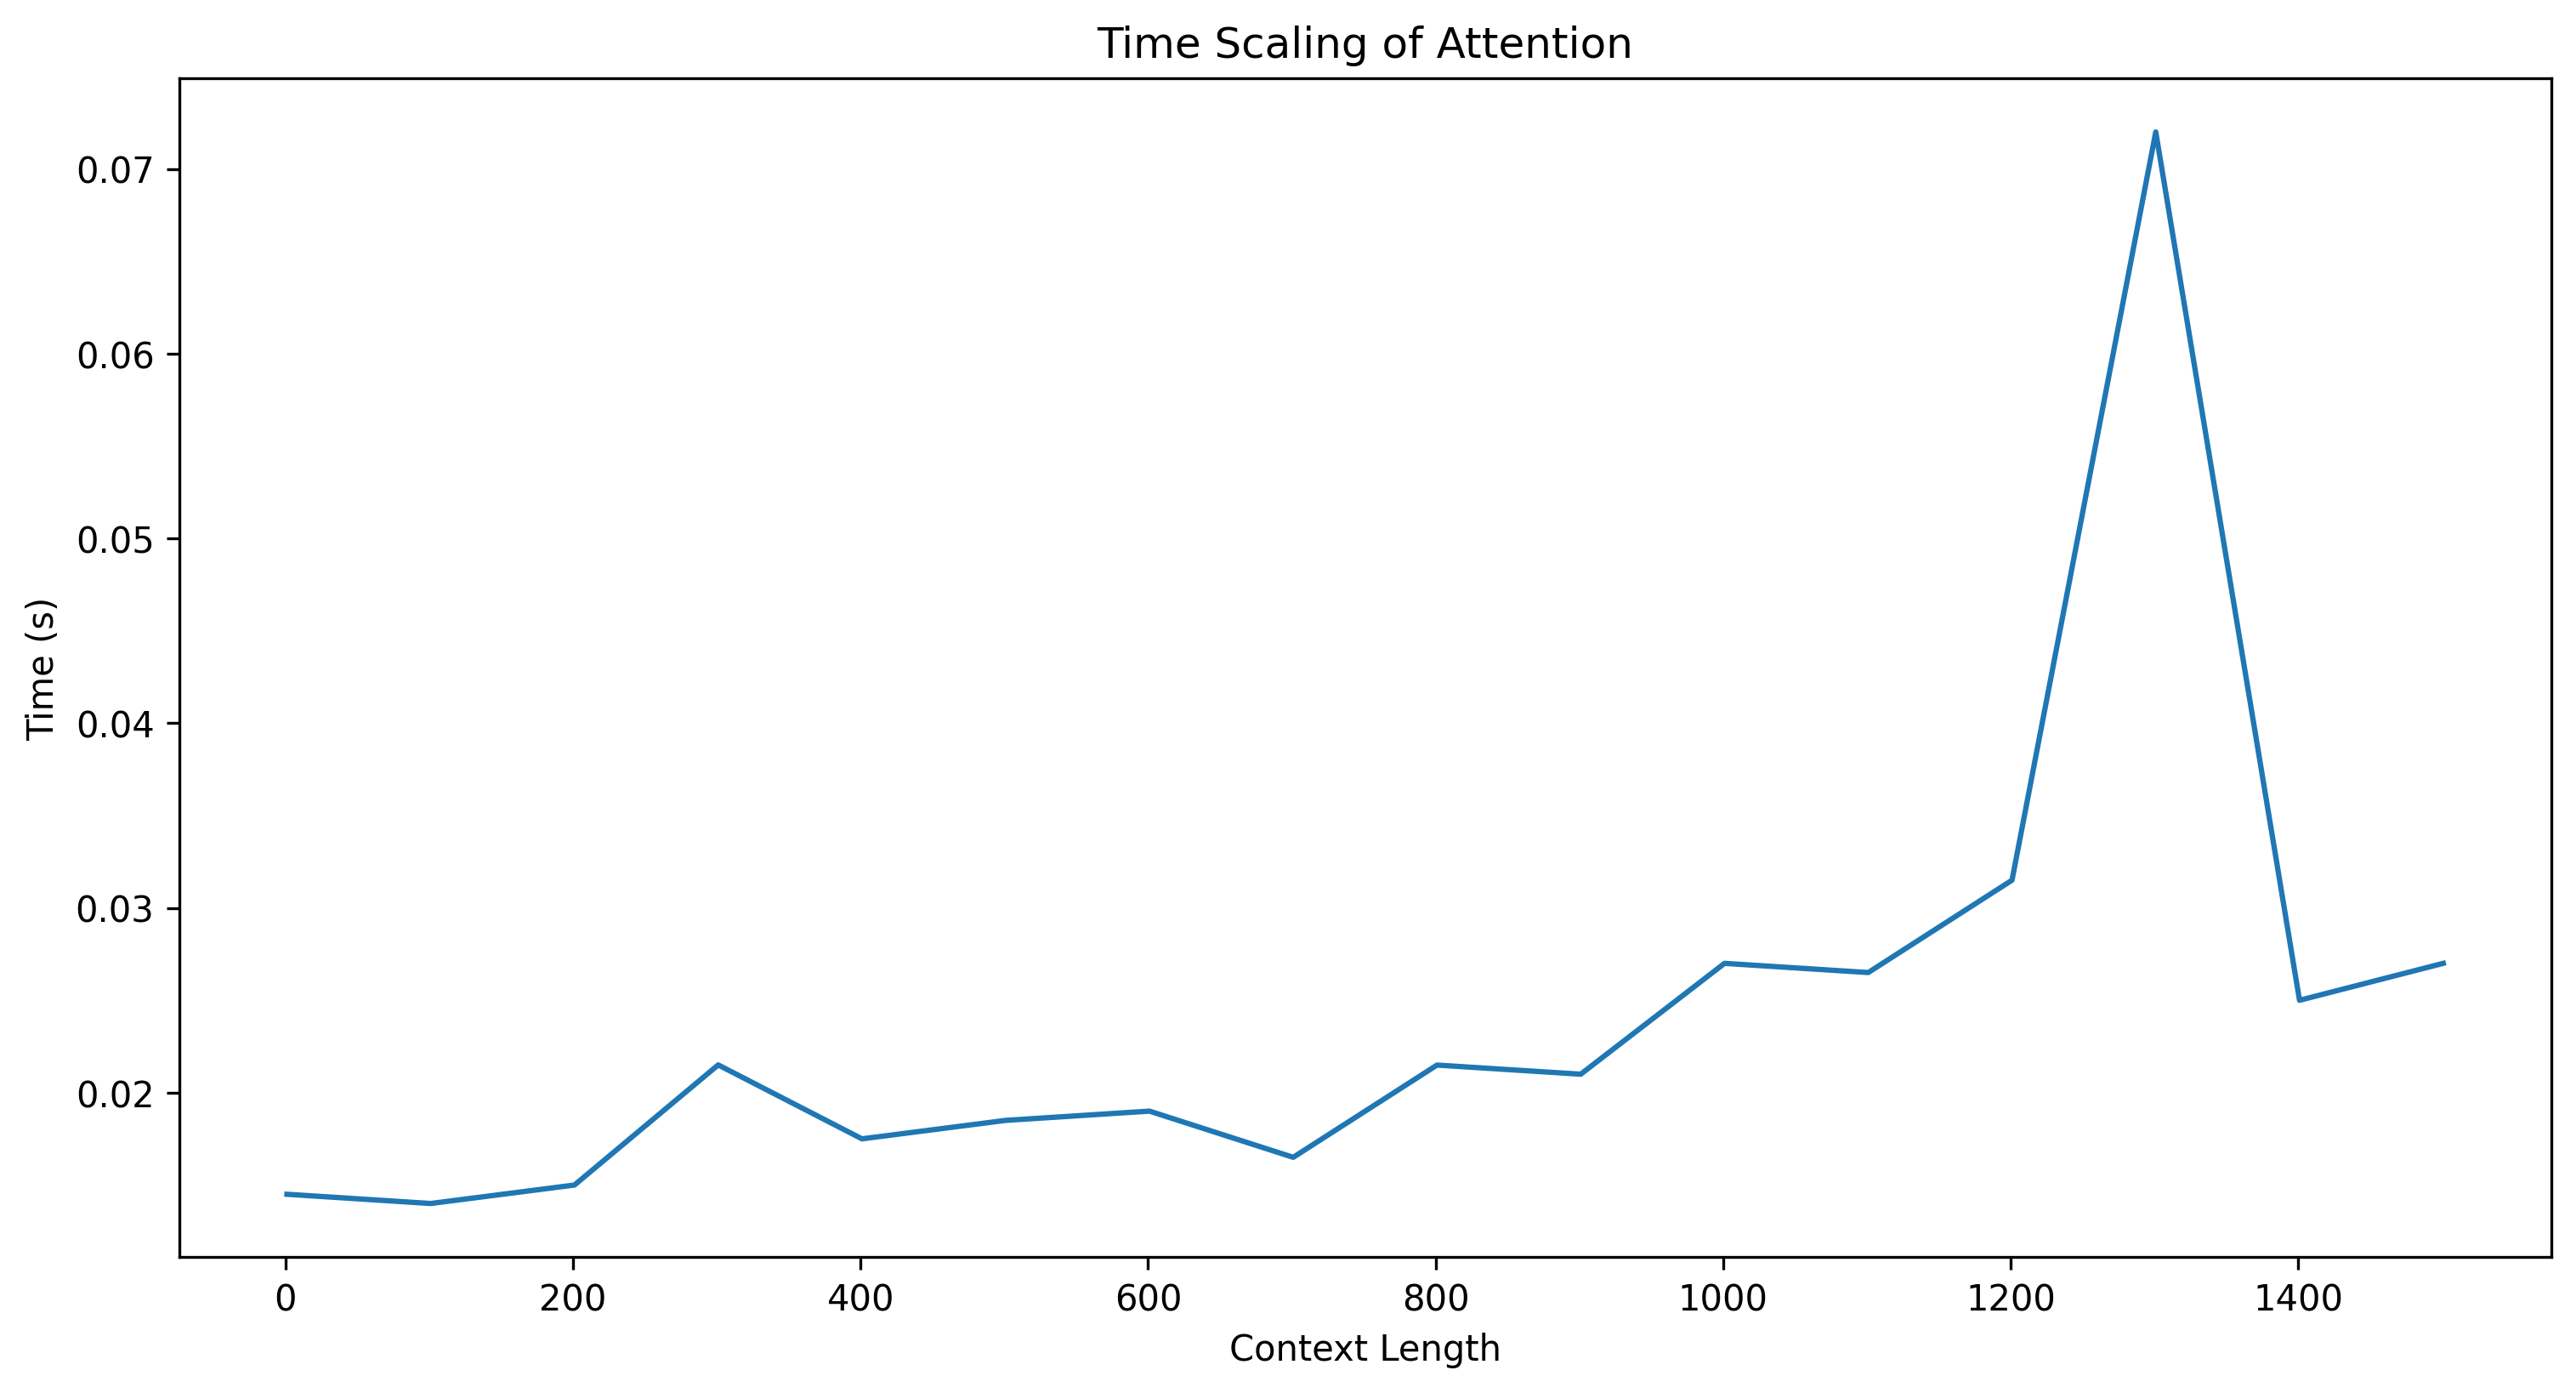

In [25]:
# look at the interval 0 - 1600 further
plt.figure(figsize=(12, 6), dpi=300)
plt.plot(context_lens[:16], times[:16])
plt.xlabel('Context Length')
plt.ylabel('Time (s)')
plt.title('Time Scaling of Attention');


In [10]:
# memory scaling of query key dot product, which is the limiting factor in attention

sizes = []
for context_len in tqdm(context_lens):
    x = jax.random.normal(rng, (1, batch_size, 1, emb_size))
    x = jnp.tile(x, (context_len, 1, 1, 1))

    scores = jnp.einsum("cbhd,Cbhd->cCbh", x, x)
    sizes.append(scores.size)

100%|██████████| 150/150 [01:44<00:00,  1.44it/s]


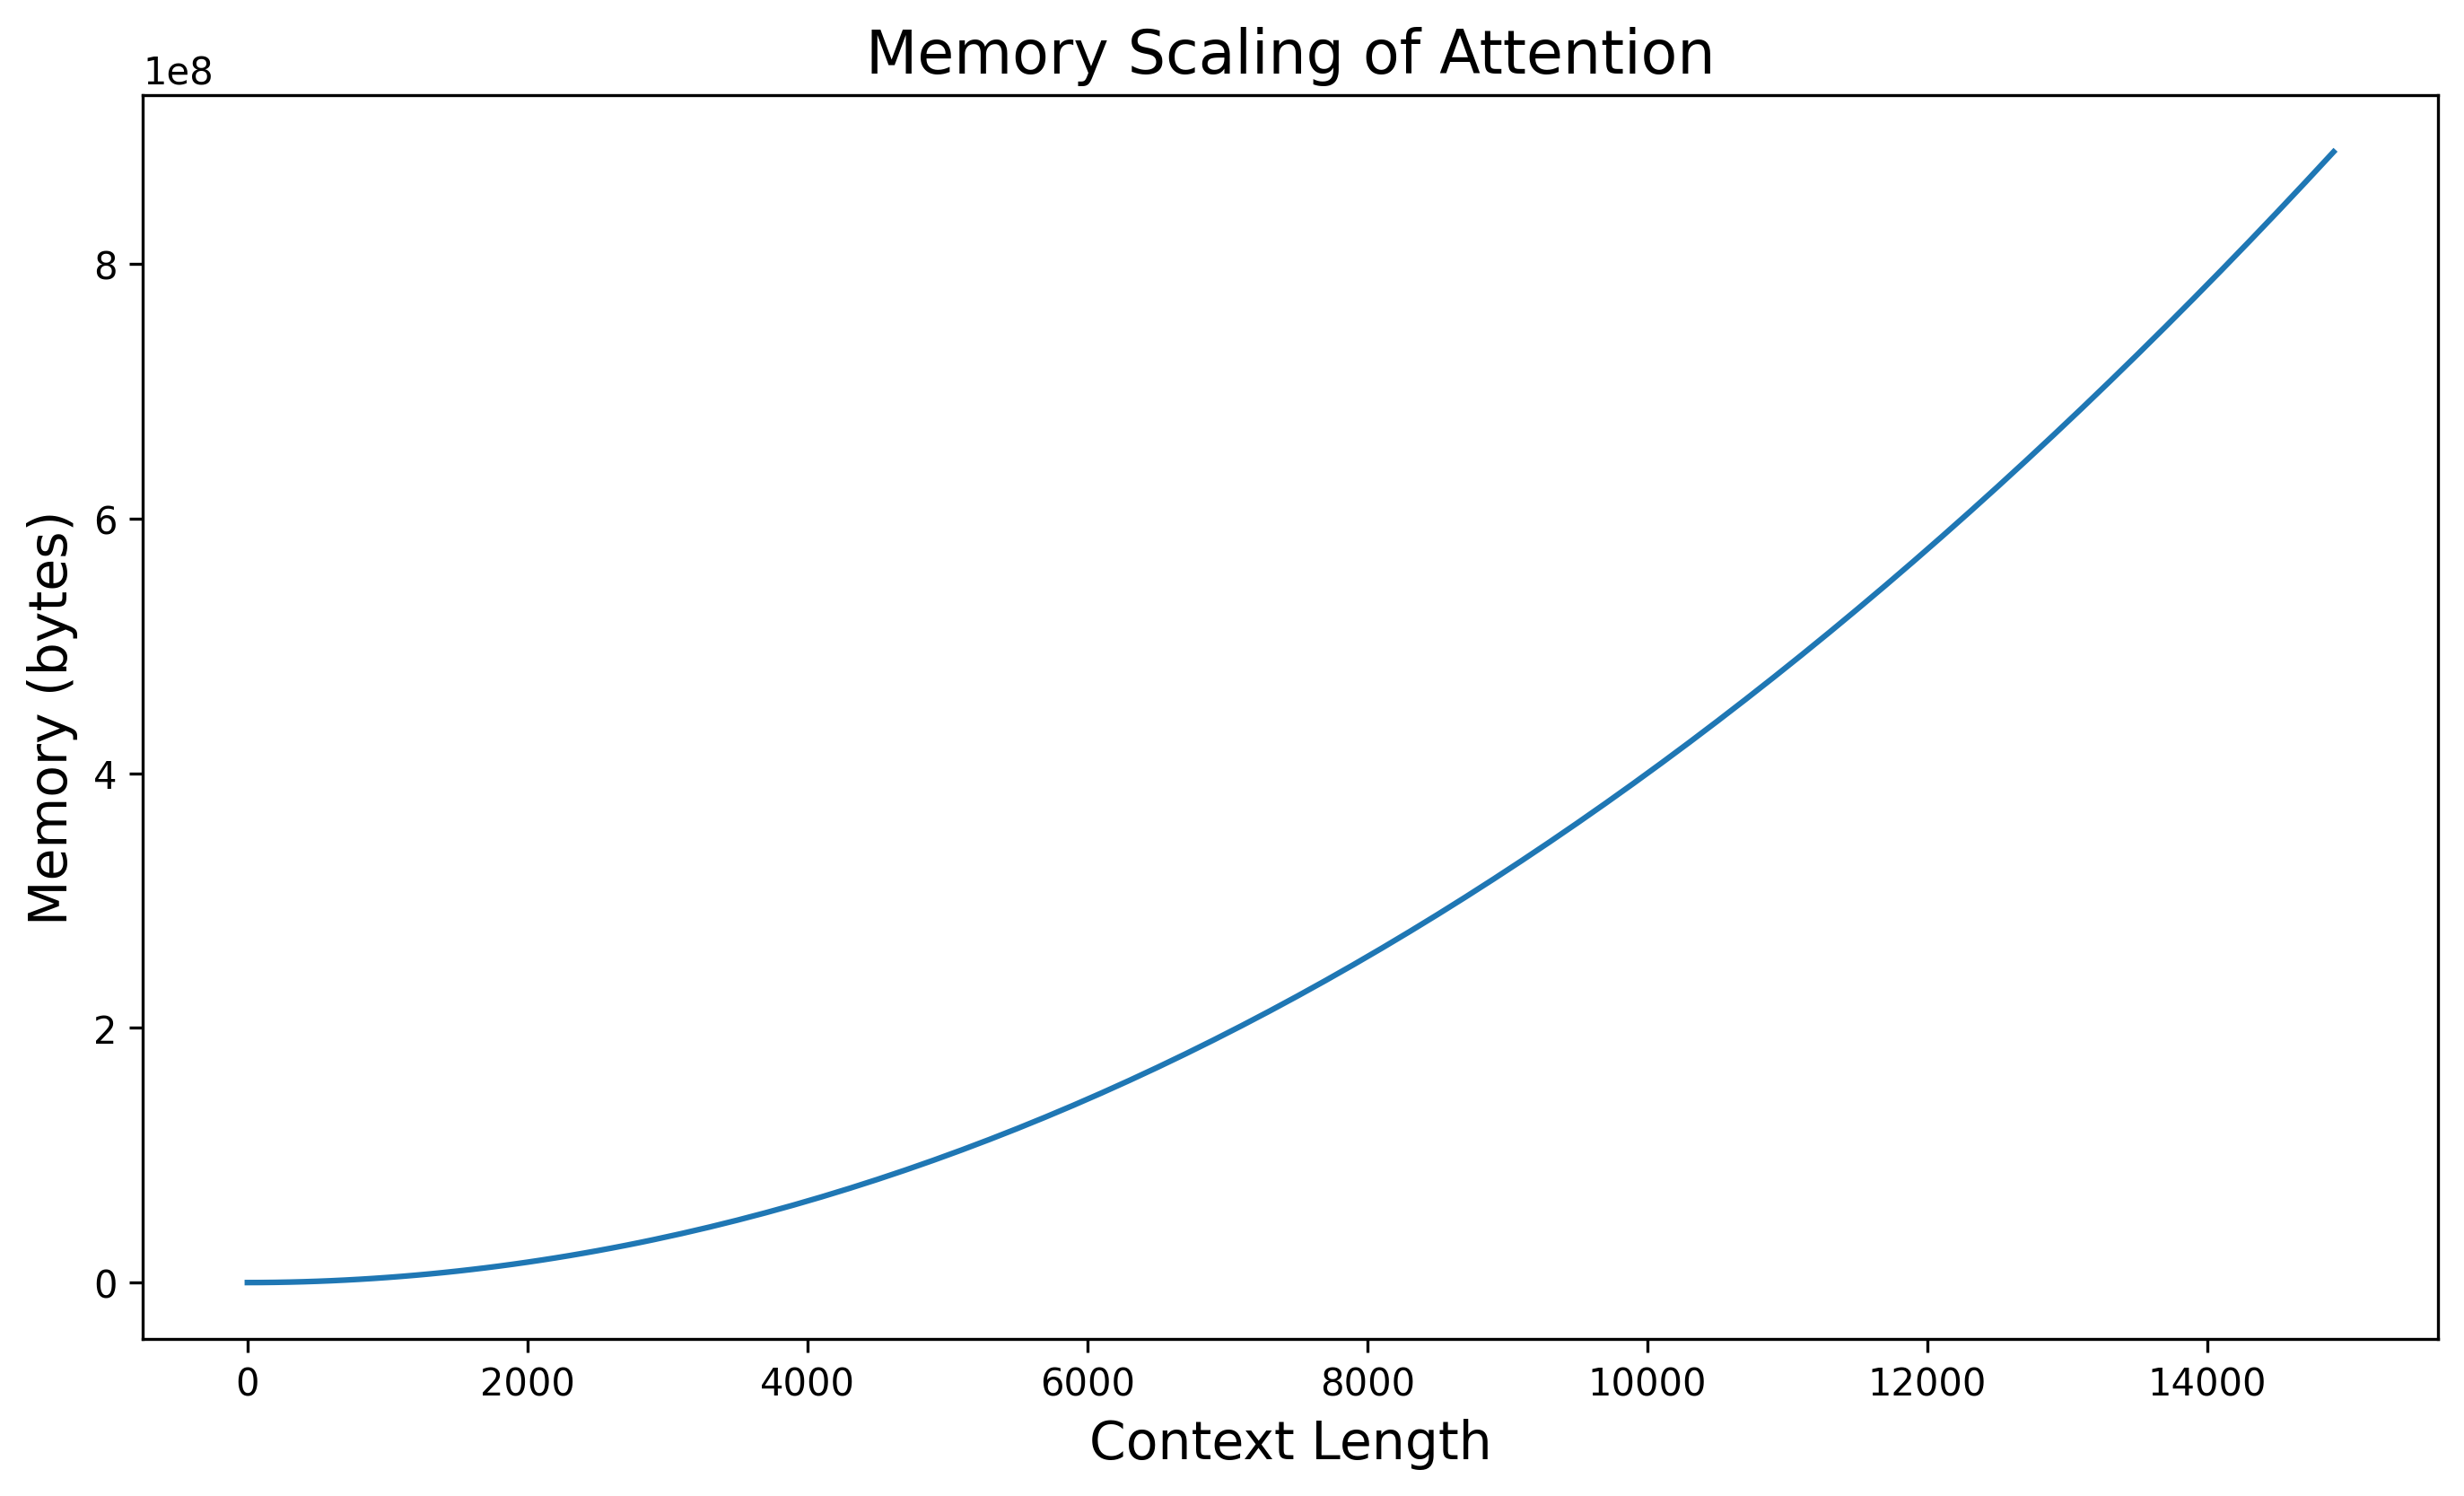

In [14]:
nbr_bytes = [4 * size for size in sizes]
plt.figure(figsize=(11, 6), dpi=300)
plt.plot(context_lens, nbr_bytes)
plt.xlabel('Context Length', fontsize=14)
plt.ylabel('Memory (bytes)', fontsize=14)
plt.title('Memory Scaling of Attention', fontsize=16);